In [1]:
from torchvision import models
import numpy as np
import cv2
import PIL

In [2]:
from pytorch_grad_cam import GradCAM,GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image,preprocess_image

In [4]:
# use the pretrained ResNet50 model
model = models.resnet50(pretrained=True)
model.eval()

# fix target class label (of the Imagenet class of interest!)
# 1: goldfish, 250: Siberian Husky, 947: mushroom

#targets = models.resnet50()

# fix the target layer (after which we'd like to generate the CAM)
target_layers = [model.layer4]

/home/jakub/Documents/Tasks/final/sp1/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jakub/Documents/Tasks/final/sp1/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


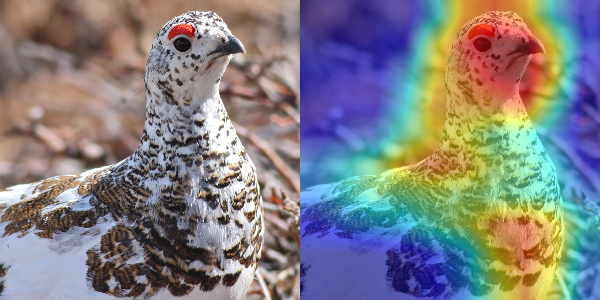

In [6]:
# instantiate the model
cam = GradCAM(model=model, target_layers=target_layers) # use GradCamPlusPlus class

# Preprocess input image, get the input image tensor
img = np.array(PIL.Image.open('bird.jpg'))
img = cv2.resize(img, (300,300))
img = np.float32(img) / 255
input_tensor = preprocess_image(img)

# generate CAM
grayscale_cams = cam(input_tensor=input_tensor, )
cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)

cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])

# display the original image & the associated CAM
images = np.hstack((np.uint8(255*img), cam_image))
PIL.Image.fromarray(images)